<a href="https://colab.research.google.com/github/guilourenzo/mba-usp/blob/master/T%C3%89CNICAS%20AVAN%C3%87ADAS%20DE%20CAPTURA%20E%20TRATAMENTO%20DE%20DADOS/AULA%207/TACTD%2007%20-%20Avaliacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MBA em Ciência de Dados
## Técnicas Avançadas de Captura e Tratamento de Dados


### <span style="color:darkred">Módulo VII - Dados não estruturados: sinais e imagens</span>

### <span style="color:darkred">Avaliação</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

#### <span style="color:red">As respostas devem ser dadas no Moodle, o notebook deve ser usado para executar código para obtenção dos resultados.</span>

---

In [0]:
# carregando as bibliotecas necessárias
import numpy as np
np.set_printoptions(suppress=True)

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()


Saving pollution.csv to pollution (1).csv


### Questão 1)

São exemplos típicos de dados não estruturados sequenciais e espaciais:

(a) sequencial: a coluna idade de uma tabela de uma base de dados relacional, ordenada de forma ascendente; espacial: mapa de calor de temperaturas em uma região <br>
(b) sequencial: valores de umidade relativa do ar obtidos em cidades diferentes de uma determinada região; espacial: os valores de uma tabela de base de dados relacional de compras<br>
(c) sequencial: valores de temperatura obtidos de hora em hora em um determinado dia e cidade; espacial: uma imagem de satélite<br>
(d) sequencial: quantidade de acessos à uma página web coletados a cada minuto; espacial: áudio capturado de uma sala de reuniões<br>

## RESPOSTA:<br>
**LETRA C**: sequencial: valores de temperatura obtidos de hora em hora em um determinado dia e cidade; espacial: uma imagem de satélite

### Questão 2)

Carregue os dados do arquivo `pollution.csv` utilizando o comando `pd.read_csv()`

Esse dataframe possui 3 colunas (0, 1 e 2) relativas a medição de monóxido de carbono durante 12 horas de dia em localidades de uma cidade, sendo que o primeiro deles (na primeira coluna) foi capturado em um mesmo bairro na periferia da cidade próximo à rodovia. Os outros dois não sabemos onde foram coletados, mas sabemos que um deles teve coleta em uma região central, e o outro também em uma região periférica.

Queremos identificar qual coluna (1 ou 2) mais se assemelha a primeira (0). Para isso, utilize a distância euclidiana e um vetor de características composto de:
* Entropia da energia (com 12 blocos)
* Entropia espectral (com 12 blocos)
* Centróide espectral (considere frequência = 0.2Hz)
* Dispersão espectral (considere frequência = 0.2Hz)

Qual coluna é a mais semelhante, e quando consideramos a comparação da coluna 0 com essa mais semelhante, qual feature (individualmente) apresentou a menor distância Euclidiana?

(a) Coluna 2, Feature Entropia da Energia<br>
(b) Coluna 1, Feature Centróide espectral<br>
(c) Coluna 2, Feature Dispersão espectral<br>
(d) Coluna 1, Feature Entropia espectral<br>

In [3]:
pollution = pd.read_csv('pollution.csv')
pollution.shape
pollution.head()

,carbon_monoxide_A,carbon_monoxide_B,carbon_monoxide_C
0,49,57,78
1,45,54,81
2,48,59,86
3,52,58,87
4,49,63,86


In [0]:
cmA = np.array(pollution['carbon_monoxide_A'])
cmB = np.array(pollution['carbon_monoxide_B'])
cmC = np.array(pollution['carbon_monoxide_C'])


In [0]:
def entropia_energia(sinal, n_blocos=12):
    '''Entropia da energia do sinal'''
    # energia total 
    energia_sinal = np.sum(sinal ** 2)
    M = len(sinal)
    
    # calcula janelas dentro do sinal
    M_janelas = int(np.floor(M / n_blocos))
    # verifica se tamanho dos blocos 
    # é multiplo do tamanho do sinal
    if M != M_janelas * n_blocos:
        sinal = sinal[0:M_janelas * n_blocos]

    # monta matriz [M_janelas x n_blocos]
    janelas = sinal.reshape(M_janelas, n_blocos, order='F').copy()
    
    # Computa energias de cada janela (normalizada pela do sinal)
    e_janelas = np.sum(janelas ** 2, axis=0) / (energia_sinal + 0.0001)
    #print(e_janelas)

    # Computa entropia entre energias das janelas
    entropia = -np.sum(e_janelas * np.log2(e_janelas + 0.0001))
    return entropia

def entropia_espectral(sinal, n_blocos=12):
    """Computes the spectral entropy"""
    
    fft_abs = np.abs(np.fft.fft(sinal))
    
    entropia_esp = entropia_energia(fft_abs, n_blocos=n_blocos)

    return entropia_esp

def centroide_dispersao_espectral(sinal, tx_amostragem=0.2):
    '''Calcula o centro de massa e dispersão do espectro do sinal'''
    
    fft_abs = np.abs( np.fft.fft(sinal) )
    N = len(fft_abs)
    
    # indices de frequencia
    ind = (np.arange(1, N+1)) * (tx_amostragem / (2.0*N))

    # calcula a distribuicao do espectro normalizando para soma unitária
    Xt = fft_abs.copy()
    Xt = Xt / Xt.max()
    NUM = np.sum(ind * Xt)
    DEN = np.sum(Xt) + 0.0001 

    # Centroide:
    centroide = (NUM / DEN)

    # Dispersão:
    dispersao = np.sqrt(np.sum(((ind - centroide) ** 2) * Xt) / DEN)

    # Normalizando:
    centroid = centroide / (tx_amostragem / 2.0)
    dispersao = dispersao / (tx_amostragem / 2.0)

    return centroide, dispersao

def Euclidean_distance(A, B):
    """ Calcula a distancia Euclidiana entre dois vetores de mesmo tamanho"""
    return  np.sqrt( np.sum((A-B)**2) )


In [0]:
#Entropia Energia com 12 blocos
cmA_ent_energia = entropia_energia(cmA)
cmB_ent_energia = entropia_energia(cmB)
cmC_ent_energia = entropia_energia(cmC)

#Entropia Espectral com 12 blocos
cmA_ent_espectral = entropia_espectral(cmA)
cmB_ent_espectral = entropia_espectral(cmB)
cmC_ent_espectral = entropia_espectral(cmC)

#Centroide Espectral & Dispersão Espectral com 0.2 Hz
cmA_disp_espectral = centroide_dispersao_espectral(cmA)
cmB_disp_espectral = centroide_dispersao_espectral(cmB)
cmC_disp_espectral = centroide_dispersao_espectral(cmC)

In [0]:
#Entropia energia
ent_energiaAB = Euclidean_distance(cmA_ent_energia, cmB_ent_energia)
ent_energiaAC = Euclidean_distance(cmA_ent_energia, cmC_ent_energia)

#Entropia espectral
ent_espectralAB = Euclidean_distance(cmA_ent_espectral, cmB_ent_espectral)
ent_espectralAC = Euclidean_distance(cmA_ent_espectral, cmC_ent_espectral)

#Disperção espectral
disp_espectralAB = Euclidean_distance(cmA_disp_espectral[1], cmB_disp_espectral[1])
disp_espectralAC = Euclidean_distance(cmA_disp_espectral[1], cmC_disp_espectral[1])

#Centróide espectral
cent_espectralAB = Euclidean_distance(cmA_disp_espectral[0], cmB_disp_espectral[0])
cent_espectralAC = Euclidean_distance(cmA_disp_espectral[0], cmC_disp_espectral[0])


In [8]:
print('Entropia Energia - A & B:', ent_energiaAB)
print('Entropia Energia - A & C:', ent_energiaAC)

print(5*'**')

print('Entropia Espectral - A & B:', ent_espectralAB)
print('Entropia Espectral - A & C:', ent_espectralAC)

print(5*'**')

print('Disperção Espectral - A & B:', disp_espectralAB)
print('Disperção Espectral - A & C:', disp_espectralAC)

print(5*'**')

print('Centróide Espectral - A & B:', cent_espectralAB)
print('Centróide Espectral - A & C:', cent_espectralAC)


Entropia Energia - A & B: 0.02734293195183435
Entropia Energia - A & C: 0.1380771769686988
**********
Entropia Espectral - A & B: 0.023982881626790076
Entropia Espectral - A & C: 0.022061922508140208
**********
Disperção Espectral - A & B: 0.00035034883870294076
Disperção Espectral - A & C: 0.00040188720178885307
**********
Centróide Espectral - A & B: 3.612498197098912e-05
Centróide Espectral - A & C: 0.0007277700766476561


## RESPOSTA:<br>
** LETRA B**: Coluna 1, Feature Centróide espectral

### Questão 3)

Carrege as imagens da base de dados `lfw_subset` contida na biblioteca `skimage`, conforme código abaixo. As 100 primeiras imagens são imagens de faces, utilize apenas essas, desconsiderando as demais.

Vamos utilizar o método LBP (com parâmetros conforme visto nos exercícios) e a distância Euclidiana para comparar faces dessa base de dados.

Utilizando como imagem de consulta a imagem 45 da lista,  e os seguintes parâmetros para o LBP:
* points = 8
* radius = 1
* n_bins = 10

Retorne as 5 imagens mais similares (excluindo a de consulta). Quais são os índices dessas imagens?

(a) 0, 1, 45, 77, 81<br>
(b) 39, 30, 77,  0, 81<br>
(c) 1, 99, 81,  0, 11<br>
(d) 1, 39, 77, 0, 81</font>

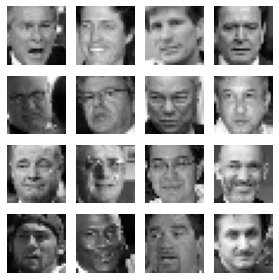

In [9]:
import matplotlib.pyplot as plt
import matplotlib
from skimage import feature
from skimage import data
fig, axes = plt.subplots(4, 4, figsize=(4, 4))
ax = axes.ravel()
imgs = data.lfw_subset()
# mostrando as 16 primeiras imagens
for i in range(16):
    ax[i].imshow(imgs[i], cmap=plt.cm.gray)
    ax[i].axis('off')
fig.tight_layout()

In [0]:
def lbp_features(img, points=8, radius=1, n_bins=10):
    # LBP opera em imagens de um só canal, aqui vamos converter 
    # RGB para escala de cinza usando o método Luminance
    img = np.array(img, dtype=np.float64, copy=False)
    if (len(img.shape) > 2):
        img = img[:,:,0]*0.3 + img[:,:,1]*0.59 + img[:,:,2]*0.11
    
    # normaliza a imagem para ter máximo = 255
    if (np.max(img) > 0):
        img = ((img/np.max(img))*255).astype(np.uint8)
    
    # aqui definimos o numero de pontos e o raio, padrao = 8, 1
    lbp = feature.local_binary_pattern(img.astype(np.uint8), points, radius, method="uniform")
    
    # lbp retorna um matriz com os códigos, então devemos extraír o histograma
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_bins+1), range=(0, n_bins))

    # normaliza o histograma
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    # return the histogram of Local Binary Patterns

    return hist

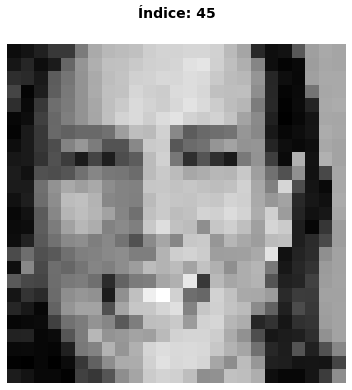

In [11]:
plt.figure(figsize=(5, 6))
plt.imshow(imgs[45], cmap=plt.cm.gray)
plt.suptitle('Índice: 45', fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()

[(1, 0.02262741696176566), (39, 0.024683597753372657), (77, 0.025399212545581328), (0, 0.027988569050475736), (81, 0.028888752090206454)]


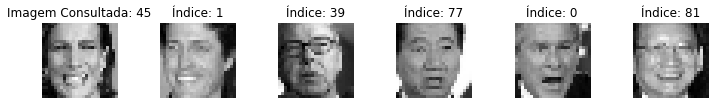

In [12]:
#imagem 45
img45 = imgs[45]

#dicionários auxiliares
lbp_images = {}
dist = {}

#busca das LBP e validação das Distâncias
for i in range(100):
    lbp_images[i] = lbp_features(imgs[i])
    
    # if i != 45:
    dist[i] = Euclidean_distance(lbp_features(img45), lbp_images[i])
    
#Ordenação das Distâncias
sorted_dist = sorted(dist.items(), key= lambda kv: kv[1])

#Exibição das 5 primeiras
print(sorted_dist[1:6])

#Exibição das faces
fig, axes = plt.subplots(1, 6, figsize=(10, 6))
ax = axes.ravel()
for i in range(6):
    ax[i].imshow(imgs[sorted_dist[i][0]], cmap=plt.cm.gray)
    if i == 0:
      ax[i].set_title('Imagem Consultada: {}'.format(sorted_dist[i][0]))
    if i != 0:
      ax[i].set_title('Índice: {}'.format(sorted_dist[i][0]))
    ax[i].axis('off')
fig.tight_layout()

### Questão 4)

Vamos utilizar o método LBP (com parâmetros conforme visto nos exercícios) e a distância Euclidiana para comparar faces na mesma base de dados utilizada na questão anterior. Porém agora vamos calcular dois descritores LBP, cada qual com parâmetros diferentes, contatená-los e utilizar esse vetor concatenado para recuperar imagens similares.

Vetor LBP 1:
* points = 8
* radius = 1
* n_bins = 10

Vetor LBP 2:
* points = 16
* radius = 3
* n_bins = 18

Utilizando como imagem de consulta a imagem 45 da lista, retorne as 5 imagens mais similares (excluindo a de consulta). Essas características com a imagem de consulta utilizada representou bem imagens com uma característica facial específica. Qual é essa característica?

(a) Pessoas de óculos<br>
(b) Mulheres brancas<br>
(c) Mulheres com cabelo de cor escura<br>
(d) Pessoas sorrindo<br>

In [13]:
#dicionários auxiliares
lbp1_images = {}
lbp2_images = {}

dist_list1 = {}
dist_list2 = {}

#busca das LBP e validação das Distâncias
for i in range(100):
    lbp1_images[i] = lbp_features(imgs[i],  8, 1, 10)
    lbp2_images[i] = lbp_features(imgs[i], 16, 3, 18)
    
    # if i != 45:
    dist_list1[i] = Euclidean_distance(lbp_features(img45,  8, 1, 10), lbp1_images[i])
    dist_list2[i] = Euclidean_distance(lbp_features(img45, 16, 3, 18), lbp2_images[i])
    
#Ordenação das Distâncias
sorted_dist_list1 = sorted(dist_list1.items(), key= lambda kv: kv[1])
sorted_dist_list2 = sorted(dist_list2.items(), key= lambda kv: kv[1])

#Exibição das 5 primeiras
print(sorted_dist_list1[1:6])
print(5*'***')
print(sorted_dist_list2[1:6])


[(1, 0.02262741696176566), (39, 0.024683597753372657), (77, 0.025399212545581328), (0, 0.027988569050475736), (81, 0.028888752090206454)]
***************
[(30, 0.03409164114971339), (92, 0.040413858944346105), (38, 0.04208942853414781), (11, 0.04358348304027038), (98, 0.04559298184313126)]


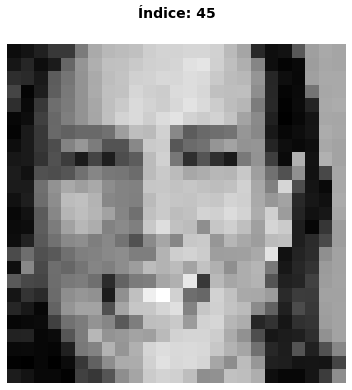

In [14]:
plt.figure(figsize=(5, 6))
plt.imshow(imgs[45], cmap=plt.cm.gray)
plt.suptitle('Índice: 45', fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()

LISTA 1


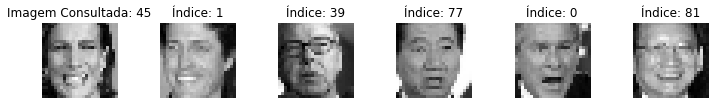

In [15]:
print('LISTA 1')
#Exibição das faces
fig, axes = plt.subplots(1, 6, figsize=(10, 6))
ax = axes.ravel()
for i in range(6):
    ax[i].imshow(imgs[sorted_dist_list1[i][0]], cmap=plt.cm.gray)
    if i == 0:
      ax[i].set_title('Imagem Consultada: {}'.format(sorted_dist_list1[i][0]))
    if i != 0:
      ax[i].set_title('Índice: {}'.format(sorted_dist_list1[i][0]))
    ax[i].axis('off')
fig.tight_layout()

LISTA 2


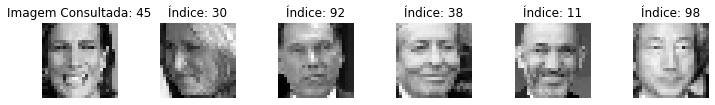

In [16]:
print('LISTA 2')
#Exibição das faces
fig, axes = plt.subplots(1, 6, figsize=(10, 6))
ax = axes.ravel()
for i in range(6):
    ax[i].imshow(imgs[sorted_dist_list2[i][0]], cmap=plt.cm.gray)
    if i == 0:
      ax[i].set_title('Imagem Consultada: {}'.format(sorted_dist_list2[i][0]))
    if i != 0:
      ax[i].set_title('Índice: {}'.format(sorted_dist_list2[i][0]))
    ax[i].axis('off')
fig.tight_layout()

## RESPOSTA:<br>
**LETRA D**: Pessoas sorrindo

### Questão 5)
 
Considere as seguintes afirmações sobre o método Bag-of-features:

I - um *framework* para aprender características com base nos dados e que pode ser aplicado em dados não estruturados como texto, sinais, imagens e vídeo.<br>
II - um método de descrição de dados não estruturados por meio do PCA.<br>
III - permite obter características que podem ser utilizadas em tarefas como: recuperação de informação, agrupamento e classificação<br>
IV - o tamanho do dicionário é um dos parâmetros mais relevantes e, em geral, quanto maior puder ser definido com base na capacidade computacional, melhores serão os resultados.<br>
V - pode-se utilizar qualquer extrator de características como base para uso no Bag-of-Features.<br>
VI - uma desvantagem do método é o número de escolhas possíveis a definir em cada etapa, as quais exigem uma busca pelos melhores parâmetros.<br>

São verdadeiras as afirmações:

(a) I, II, III e V<br>
(b) I, III, V e VI<br>
(c) I, III, IV, V e VI<br>
(d) I, III, IV, V<br>

## RESPOSTA:<br>
**LETRA B**: I, III, V e VI